# Coding Assignment 1: Introduction to Linear Regression

**Name:** [Your Name Here]  
**Student ID:** [Your Student ID]  
**Date:** [Today's Date]  

## Overview

Welcome to your first machine learning assignment! In this notebook, you'll journey from mathematical foundations to practical implementation of linear regression. You'll build your own linear regression from scratch, then compare it with professional ML libraries.

**Learning Goals:**
- Understand linear regression mathematics
- Implement gradient descent from scratch
- Apply ML to real housing price data
- Reflect on ML vs. traditional programming

**Estimated Time:** 2 hours

## Part 1: Mathematical Foundation (30 minutes)

Before we code, let's understand the mathematics behind linear regression.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.3.2


### 1.1 Understanding the Linear Equation

Linear regression finds the best line through data points. For one feature:

**y = mx + b**

For multiple features:

**y = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ**

Or in vector form: **y = X·θ**

Where:
- **y** = predicted value
- **X** = feature matrix
- **θ** = parameters (weights)


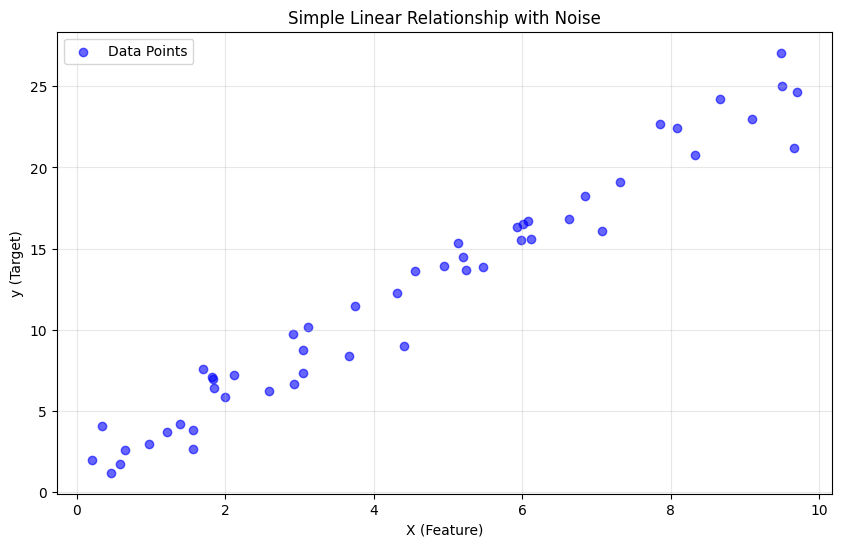

Data shape: (50, 1)
Target shape: (50,)


In [2]:
# Let's create some simple synthetic data to visualize linear regression
np.random.seed(42)
X_simple = np.random.rand(50, 1) * 10  # 50 random points between 0 and 10
y_simple = 2.5 * X_simple.flatten() + 1.0 + np.random.randn(50) * 1.5  # y = 2.5x + 1 + noise

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, color='blue', label='Data Points')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Simple Linear Relationship with Noise')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Data shape: {X_simple.shape}")
print(f"Target shape: {y_simple.shape}")

### 1.2 The Cost Function

We need to measure how "wrong" our predictions are. The **Mean Squared Error (MSE)** cost function is:

**J(θ) = (1/2m) × Σ(hθ(x⁽ⁱ⁾) - y⁽ⁱ⁾)²**

Where:
- **m** = number of training examples
- **hθ(x⁽ⁱ⁾)** = prediction for example i
- **y⁽ⁱ⁾** = actual value for example i

In [ ]:
def compute_cost(X, y, theta):
    """
    Compute the mean squared error cost function.
    
    Parameters:
    X (array): Feature matrix with bias column
    y (array): Target values
    theta (array): Parameters [bias, weight1, weight2, ...]
    
    Returns:
    cost (float): Mean squared error
    """
    m = len(y)  # number of examples
    
    # TODO: Calculate predictions using X @ theta (matrix multiplication)
    predictions = None  # Replace None with your code
    
    # TODO: Calculate errors (predictions - actual values)
    errors = None  # Replace None with your code
    
    # TODO: Square the errors
    squared_errors = None  # Replace None with your code
    
    # TODO: Calculate mean squared error: (1/2m) * sum of squared errors
    cost = None  # Replace None with your code
    
    return cost

# Test the cost function when you're done
# Add bias column to X_simple
X_simple_with_bias = np.column_stack([np.ones(X_simple.shape[0]), X_simple])

# Test with random parameters
test_theta = np.array([0.0, 1.0])  # [bias, weight]

# TODO: Uncomment the next line after implementing the function
# test_cost = compute_cost(X_simple_with_bias, y_simple, test_theta)
# print(f"Test cost with theta=[0, 1]: {test_cost:.4f}")

### 1.3 Gradient Descent

To minimize the cost function, we use **gradient descent**. We update parameters iteratively:

**θⱼ := θⱼ - α × (∂J(θ)/∂θⱼ)**

For linear regression, the gradient is:

**∂J(θ)/∂θⱼ = (1/m) × Σ(hθ(x⁽ⁱ⁾) - y⁽ⁱ⁾) × xⱼ⁽ⁱ⁾**

Where **α** is the learning rate.

In [ ]:
def compute_gradients(X, y, theta):
    """
    Compute gradients for gradient descent.
    
    Parameters:
    X (array): Feature matrix with bias column
    y (array): Target values  
    theta (array): Current parameters
    
    Returns:
    gradients (array): Gradients for each parameter
    """
    m = len(y)  # number of examples
    
    # TODO: Calculate predictions using X @ theta
    predictions = None  # Replace None with your code
    
    # TODO: Calculate errors (predictions - actual values)
    errors = None  # Replace None with your code
    
    # TODO: Calculate gradients using matrix operations
    # Hint: The gradient formula is (1/m) * X.T @ errors
    gradients = None  # Replace None with your code
    
    return gradients

# TODO: Test gradient computation after implementing the function
# Uncomment the lines below:
# test_gradients = compute_gradients(X_simple_with_bias, y_simple, test_theta)
# print(f"Gradients with theta=[0, 1]: {test_gradients}")
# print(f"Gradient for bias: {test_gradients[0]:.4f}")
# print(f"Gradient for weight: {test_gradients[1]:.4f}")

## Part 2: From-Scratch Implementation (45 minutes)

Now let's build our own Linear Regression class!

In [ ]:
class LinearRegression:
    """
    Linear Regression implementation using gradient descent.
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        """
        Initialize the Linear Regression model.
        
        Parameters:
        learning_rate (float): Step size for gradient descent
        max_iterations (int): Maximum number of iterations
        tolerance (float): Convergence tolerance
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.theta = None
        self.cost_history = []
        
    def _add_bias_column(self, X):
        """
        Add bias column (column of ones) to feature matrix.
        
        Parameters:
        X (array): Feature matrix
        
        Returns:
        X_with_bias (array): Feature matrix with bias column
        """
        # TODO: Create a column of ones and add it to the beginning of X
        # Hint: Use np.ones() and np.column_stack()
        bias_column = None  # Replace None with your code
        X_with_bias = None  # Replace None with your code
        return X_with_bias
    
    def fit(self, X, y):
        """
        Train the linear regression model using gradient descent.
        
        Parameters:
        X (array): Training features
        y (array): Training targets
        """
        # Add bias column
        X_with_bias = self._add_bias_column(X)
        
        # Initialize parameters
        n_features = X_with_bias.shape[1]
        # TODO: Initialize theta with small random values
        # Hint: Use np.random.normal(0, 0.01, n_features)
        self.theta = None  # Replace None with your code
        
        # Gradient descent
        self.cost_history = []
        
        for iteration in range(self.max_iterations):
            # TODO: Compute current cost using the compute_cost function
            current_cost = None  # Replace None with your code
            self.cost_history.append(current_cost)
            
            # TODO: Compute gradients using the compute_gradients function
            gradients = None  # Replace None with your code
            
            # TODO: Update parameters using gradient descent rule
            # New theta = old theta - learning_rate * gradients
            new_theta = None  # Replace None with your code
            
            # Check for convergence
            if np.allclose(self.theta, new_theta, atol=self.tolerance):
                print(f"Converged after {iteration + 1} iterations")
                break
                
            self.theta = new_theta
            
            # Print progress every 100 iterations
            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}: Cost = {current_cost:.6f}")
    
    def predict(self, X):
        """
        Make predictions using the trained model.
        
        Parameters:
        X (array): Features to predict
        
        Returns:
        predictions (array): Predicted values
        """
        if self.theta is None:
            raise Exception("Model must be trained first. Call fit() method.")
        
        # TODO: Add bias column and make predictions
        # Hint: Use self._add_bias_column() and matrix multiplication
        X_with_bias = None  # Replace None with your code
        predictions = None  # Replace None with your code
        
        return predictions
    
    def score(self, X, y):
        """
        Calculate R-squared score.
        
        Parameters:
        X (array): Features
        y (array): True values
        
        Returns:
        r2 (float): R-squared score
        """
        y_pred = self.predict(X)
        
        # TODO: Calculate R-squared using the formula: 1 - (SS_res / SS_tot)
        # SS_res = sum of squared residuals = sum((y_true - y_pred)^2)
        # SS_tot = total sum of squares = sum((y_true - y_mean)^2)
        ss_res = None  # Replace None with your code
        ss_tot = None  # Replace None with your code
        r2 = None  # Replace None with your code
        
        return r2

print("LinearRegression class defined successfully!")
print("TODO: Complete the missing implementations in the methods above")

### 2.1 Test Your Implementation

Let's test your linear regression on the synthetic data we created earlier.

In [ ]:
# TODO: After implementing your LinearRegression class, uncomment and run this code

# Create and train our model
# print("Training our from-scratch Linear Regression...")
# our_model = LinearRegression(learning_rate=0.1, max_iterations=1000)
# our_model.fit(X_simple, y_simple)

# Make predictions
# y_pred_ours = our_model.predict(X_simple)

# Calculate metrics
# our_r2 = our_model.score(X_simple, y_simple)
# our_mse = mean_squared_error(y_simple, y_pred_ours)

# print(f"\nOur Model Results:")
# print(f"Final parameters (theta): {our_model.theta}")
# print(f"R² Score: {our_r2:.4f}")
# print(f"MSE: {our_mse:.4f}")
# print(f"Bias (intercept): {our_model.theta[0]:.4f}")
# print(f"Weight (slope): {our_model.theta[1]:.4f}")

print("TODO: Uncomment the code above after implementing your LinearRegression class")

In [ ]:
# Compare with scikit-learn (this will work regardless of your implementation)
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_simple, y_simple)
y_pred_sklearn = sklearn_model.predict(X_simple)

sklearn_r2 = sklearn_model.score(X_simple, y_simple)
sklearn_mse = mean_squared_error(y_simple, y_pred_sklearn)

print(f"Scikit-learn Results:")
print(f"R² Score: {sklearn_r2:.4f}")
print(f"MSE: {sklearn_mse:.4f}")
print(f"Bias (intercept): {sklearn_model.intercept_:.4f}")
print(f"Weight (slope): {sklearn_model.coef_[0]:.4f}")

# TODO: Uncomment the comparison code below after implementing your model
# print(f"\nComparison:")
# print(f"R² difference: {abs(our_r2 - sklearn_r2):.6f}")
# print(f"MSE difference: {abs(our_mse - sklearn_mse):.6f}")

In [ ]:
# TODO: Uncomment and complete this visualization code after implementing your model

# Visualize the results
# plt.figure(figsize=(15, 5))

# # Plot 1: Data and predictions
# plt.subplot(1, 3, 1)
# plt.scatter(X_simple, y_simple, alpha=0.6, color='blue', label='Data')
# plt.plot(X_simple, y_pred_ours, 'r-', label=f'Our Model (R²={our_r2:.3f})', linewidth=2)
# plt.plot(X_simple, y_pred_sklearn, 'g--', label=f'Scikit-learn (R²={sklearn_r2:.3f})', linewidth=2)
# plt.xlabel('X (Feature)')
# plt.ylabel('y (Target)')
# plt.title('Model Comparison')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot 2: Cost function history
# plt.subplot(1, 3, 2)
# plt.plot(our_model.cost_history, 'b-', linewidth=2)
# plt.xlabel('Iteration')
# plt.ylabel('Cost (MSE)')
# plt.title('Learning Curve')
# plt.grid(True, alpha=0.3)

# # Plot 3: Actual vs Predicted
# plt.subplot(1, 3, 3)
# min_val = min(y_simple.min(), y_pred_ours.min())
# max_val = max(y_simple.max(), y_pred_ours.max())
# plt.scatter(y_simple, y_pred_ours, alpha=0.6, color='red', label='Our Model')
# plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, label='Perfect Prediction')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

print("TODO: Uncomment the visualization code above after implementing your LinearRegression class")

### 2.2 Reflection Questions

**TODO: Answer these questions in the markdown cells below:**

1. How close are your results to scikit-learn's implementation?
2. What do you notice about the convergence of the cost function?
3. What happens if you change the learning rate? Try different values.

**Your Answer for Question 1:**

[TODO: Write your answer here]

**Your Answer for Question 2:**

[TODO: Write your answer here]

**Your Answer for Question 3:**

[TODO: Experiment with different learning rates and write your observations here]

## Part 3: Real-World Application (30 minutes)

Now let's apply our linear regression to real housing price data!

In [ ]:
# Load the California Housing dataset
print("Loading California Housing dataset...")
california_data = fetch_california_housing()
X_california = california_data.data
y_california = california_data.target
feature_names = california_data.feature_names

print(f"Dataset shape: {X_california.shape}")
print(f"Features: {feature_names}")
print(f"Target range: ${y_california.min():.1f} - ${y_california.max():.1f} (in $100K units)")
print(f"\nFirst few samples:")

# Create a DataFrame for better visualization
df_california = pd.DataFrame(X_california, columns=feature_names)
df_california['PRICE'] = y_california
print(df_california.head())

### 3.1 Data Exploration

Let's understand our data before applying machine learning.

In [ ]:
# Basic statistics
print("Dataset Statistics:")
print(df_california.describe())

# Check for missing values
print(f"\nMissing values: {df_california.isnull().sum().sum()}")

In [ ]:
# Visualize some key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Select some interesting features to plot
interesting_features = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude']
feature_descriptions = {
    'MedInc': 'Median income in block',
    'HouseAge': 'Median house age in block',
    'AveRooms': 'Average rooms per household',
    'Population': 'Block population',
    'AveOccup': 'Average occupancy',
    'Latitude': 'Block latitude'
}

for i, feature in enumerate(interesting_features):
    axes[i].scatter(df_california[feature], df_california['PRICE'], alpha=0.6)
    axes[i].set_xlabel(f'{feature} ({feature_descriptions[feature]})')
    axes[i].set_ylabel('House Price ($100K)')
    axes[i].set_title(f'Price vs {feature}')
    axes[i].grid(True, alpha=0.3)
    
    # Calculate correlation
    correlation = np.corrcoef(df_california[feature], df_california['PRICE'])[0, 1]
    axes[i].text(0.05, 0.95, f'r = {correlation:.3f}', 
                transform=axes[i].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### 3.2 Data Preprocessing

For gradient descent to work well, we need to scale our features.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_california, y_california, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling applied:")
print(f"Original range - min: {X_train.min():.2f}, max: {X_train.max():.2f}")
print(f"Scaled range - min: {X_train_scaled.min():.2f}, max: {X_train_scaled.max():.2f}")
print(f"Scaled mean: {X_train_scaled.mean():.6f}, std: {X_train_scaled.std():.6f}")

### 3.3 Apply Both Implementations

In [ ]:
# Train our from-scratch model
print("Training our Linear Regression on housing data...")
our_housing_model = LinearRegression(learning_rate=0.1, max_iterations=2000)
our_housing_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_ours = our_housing_model.predict(X_train_scaled)
y_test_pred_ours = our_housing_model.predict(X_test_scaled)

# Calculate metrics for our model
our_train_r2 = our_housing_model.score(X_train_scaled, y_train)
our_test_r2 = our_housing_model.score(X_test_scaled, y_test)
our_train_mse = mean_squared_error(y_train, y_train_pred_ours)
our_test_mse = mean_squared_error(y_test, y_test_pred_ours)

print(f"\nOur Model - Housing Data Results:")
print(f"Training R²: {our_train_r2:.4f}")
print(f"Test R²: {our_test_r2:.4f}")
print(f"Training MSE: {our_train_mse:.4f}")
print(f"Test MSE: {our_test_mse:.4f}")

In [ ]:
# Train scikit-learn model for comparison
print("Training scikit-learn model...")
sklearn_housing_model = SklearnLinearRegression()
sklearn_housing_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_sklearn = sklearn_housing_model.predict(X_train_scaled)
y_test_pred_sklearn = sklearn_housing_model.predict(X_test_scaled)

# Calculate metrics
sklearn_train_r2 = sklearn_housing_model.score(X_train_scaled, y_train)
sklearn_test_r2 = sklearn_housing_model.score(X_test_scaled, y_test)
sklearn_train_mse = mean_squared_error(y_train, y_train_pred_sklearn)
sklearn_test_mse = mean_squared_error(y_test, y_test_pred_sklearn)

print(f"Scikit-learn - Housing Data Results:")
print(f"Training R²: {sklearn_train_r2:.4f}")
print(f"Test R²: {sklearn_test_r2:.4f}")
print(f"Training MSE: {sklearn_train_mse:.4f}")
print(f"Test MSE: {sklearn_test_mse:.4f}")

print(f"\nModel Comparison:")
print(f"Test R² difference: {abs(our_test_r2 - sklearn_test_r2):.6f}")
print(f"Test MSE difference: {abs(our_test_mse - sklearn_test_mse):.6f}")

In [ ]:
# Visualize housing data results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training predictions
axes[0, 0].scatter(y_train, y_train_pred_ours, alpha=0.6, color='red', label='Our Model')
axes[0, 0].scatter(y_train, y_train_pred_sklearn, alpha=0.6, color='blue', label='Scikit-learn')
min_val = min(y_train.min(), y_train_pred_ours.min())
max_val = max(y_train.max(), y_train_pred_ours.max())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
axes[0, 0].set_xlabel('Actual Price ($100K)')
axes[0, 0].set_ylabel('Predicted Price ($100K)')
axes[0, 0].set_title(f'Training Set Predictions')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Test predictions
axes[0, 1].scatter(y_test, y_test_pred_ours, alpha=0.6, color='red', label=f'Our Model (R²={our_test_r2:.3f})')
axes[0, 1].scatter(y_test, y_test_pred_sklearn, alpha=0.6, color='blue', label=f'Scikit-learn (R²={sklearn_test_r2:.3f})')
min_val = min(y_test.min(), y_test_pred_ours.min())
max_val = max(y_test.max(), y_test_pred_ours.max())
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
axes[0, 1].set_xlabel('Actual Price ($100K)')
axes[0, 1].set_ylabel('Predicted Price ($100K)')
axes[0, 1].set_title('Test Set Predictions')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Learning curve
axes[1, 0].plot(our_housing_model.cost_history, 'b-', linewidth=2)
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Cost (MSE)')
axes[1, 0].set_title('Learning Curve - Housing Data')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Feature importance (weights)
feature_weights = our_housing_model.theta[1:]  # Exclude bias term
sorted_indices = np.argsort(np.abs(feature_weights))[::-1]
axes[1, 1].bar(range(len(feature_weights)), np.abs(feature_weights)[sorted_indices])
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Absolute Weight')
axes[1, 1].set_title('Feature Importance (|Weights|)')
axes[1, 1].set_xticks(range(len(feature_weights)))
axes[1, 1].set_xticklabels([feature_names[i] for i in sorted_indices], rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Analysis Questions

**TODO: Answer these questions based on your results:**

**1. How well does your model perform on the housing data? What does the R² score tell you?**

[TODO: Write your answer here]

**2. Which features seem most important for predicting house prices? Look at the feature weights.**

[TODO: Write your answer here]

**3. How do training and test performance compare? What does this suggest about your model?**

[TODO: Write your answer here]

## Part 4: Critical Reflection (15 minutes)

Now let's reflect on the bigger picture: How does machine learning differ from traditional programming?

### 4.1 ML vs Traditional Programming

**Traditional Programming:**
- We write explicit rules and logic
- Input + Program → Output
- Deterministic and predictable
- Example: `if temperature > 80: recommend_shorts()`

**Machine Learning:**
- We provide examples and let the algorithm learn patterns
- Input + Output → Program (Model)
- Statistical and probabilistic
- Example: Learn from 10,000 weather/clothing combinations

**TODO: Provide a specific example from your housing price prediction experience:**

**Example from Housing Prediction:**

**Traditional Programming Approach:**
[TODO: Describe how you might write traditional code to estimate house prices]

**Machine Learning Approach:**
[TODO: Describe how ML learned to predict house prices from your experience]

### 4.2 When to Use Machine Learning

**TODO: Based on your experience, answer these questions:**

**1. When would you choose machine learning over traditional programming?**

[TODO: Write your answer here]

**2. When would traditional programming be better than machine learning?**

[TODO: Write your answer here]

**3. What are the main challenges you encountered with machine learning in this assignment?**

[TODO: Write your answer here]

### 4.3 Limitations of Linear Regression

**TODO: Reflect on what you've learned:**

**1. What assumptions does linear regression make? When might these be violated?**

[TODO: Write your answer here]

**2. How could you improve your housing price predictions?**

[TODO: Write your answer here]

## Bonus: Experimentation (Optional)

If you have extra time, try these experiments:

In [ ]:
# Bonus 1: Try different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]
results = []

for lr in learning_rates:
    model = LinearRegression(learning_rate=lr, max_iterations=1000)
    model.fit(X_train_scaled, y_train)
    test_r2 = model.score(X_test_scaled, y_test)
    results.append((lr, test_r2, len(model.cost_history)))
    print(f"Learning rate {lr}: R² = {test_r2:.4f}, Iterations = {len(model.cost_history)}")

# TODO: What do you observe about different learning rates?

**Observations about Learning Rates:**

[TODO: Write your observations here]

In [ ]:
# Bonus 2: Feature selection - try using only the most important features
# Get the top 5 most important features
feature_weights = our_housing_model.theta[1:]  # Exclude bias
top_features_idx = np.argsort(np.abs(feature_weights))[::-1][:5]

print(f"Top 5 most important features:")
for i, idx in enumerate(top_features_idx):
    print(f"{i+1}. {feature_names[idx]}: weight = {feature_weights[idx]:.4f}")

# Train model with only top features
X_train_top = X_train_scaled[:, top_features_idx]
X_test_top = X_test_scaled[:, top_features_idx]

top_model = LinearRegression(learning_rate=0.1, max_iterations=1000)
top_model.fit(X_train_top, y_train)

top_test_r2 = top_model.score(X_test_top, y_test)
print(f"\nR² with all features: {our_test_r2:.4f}")
print(f"R² with top 5 features: {top_test_r2:.4f}")
print(f"Difference: {our_test_r2 - top_test_r2:.4f}")

## Summary and Submission

### What You've Accomplished

Congratulations! In this assignment, you have:

✅ **Understood the mathematics** behind linear regression  
✅ **Implemented gradient descent** from scratch  
✅ **Built a complete ML pipeline** for housing price prediction  
✅ **Compared your implementation** with professional libraries  
✅ **Reflected critically** on ML vs traditional programming  

### Key Takeaways

**TODO: Write 2-3 key insights from this assignment:**

1. [TODO: Your first key takeaway]
2. [TODO: Your second key takeaway]  
3. [TODO: Your third key takeaway]

### Final Reflection

**TODO: Write a brief (100-150 words) final reflection on your experience with this assignment:**

[TODO: Your final reflection here]

---

**Assignment Complete!** 

Make sure to:
1. Save your notebook
2. Export as HTML
3. Submit both .ipynb and .html files
4. Include your name and student ID at the top